# IS 362 - Project 2: Baseball Card Inventory

To begin, I will import the pandas module.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plot
from pandas import DataFrame

# Enable inline plotting
%matplotlib inline

Set some pandas options for controlling output display.

In [2]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

Next, read the baseball cards CSV file, set column names and index.

In [3]:
floc = r'D:\Projects\Educational\IS362\project-2\data\bbcards.csv'
bb_csv = pd.read_csv(floc)
bb_csv.columns = ['ID',
                  'Player Name',
                  'Position',
                  'Company',
                  'Set_Number',
                  'Set_Year',
                  'Condition',
                  'Estimated_Value',
                  'Actual_Value']
bb_csv.set_index('ID', inplace=True)
bb_csv

,Player Name,Position,Company,Set_Number,Set_Year,Condition,Estimated_Value,Actual_Value
ID,,,,,,,,
2,Sparky Anderson,MGR,Topps,609,1990,EXCELLENT,NaN,NaN
3,Jose DeLeon,P,Topps,85,1992,EXCELLENT,NaN,NaN
4,Cris Carpenter,P,Topps,147,1992,EXCELLENT,NaN,NaN
5,RJ Reynolds,RF,Score,273,1991,EXCELLENT,NaN,NaN
6,Mike Stanley,C,Topps,587,1989,GOOD,NaN,NaN
...,...,...,...,...,...,...,...,...
194,George Brett,1B-3B,Topps,700,1988,EXCELLENT,NaN,NaN
195,Bobby Bonilla,1B-OF,Topps,681,1988,FAIR,NaN,NaN
196,Graig Nettles,1B-3B,Topps,574,1988,EXCELLENT,NaN,NaN


Then create a copy of the baseball card inventory DataFrame.

In [4]:
bb_cp = bb_csv.copy()

Peform an in-place replacement all NaN values in the dataframe.

In [5]:
bb_cp.fillna(0, inplace=True)
bb_cp

,Player Name,Position,Company,Set_Number,Set_Year,Condition,Estimated_Value,Actual_Value
ID,,,,,,,,
2,Sparky Anderson,MGR,Topps,609,1990,EXCELLENT,0.0,0.0
3,Jose DeLeon,P,Topps,85,1992,EXCELLENT,0.0,0.0
4,Cris Carpenter,P,Topps,147,1992,EXCELLENT,0.0,0.0
5,RJ Reynolds,RF,Score,273,1991,EXCELLENT,0.0,0.0
6,Mike Stanley,C,Topps,587,1989,GOOD,0.0,0.0
...,...,...,...,...,...,...,...,...
194,George Brett,1B-3B,Topps,700,1988,EXCELLENT,0.0,0.0
195,Bobby Bonilla,1B-OF,Topps,681,1988,FAIR,0.0,0.0
196,Graig Nettles,1B-3B,Topps,574,1988,EXCELLENT,0.0,0.0


Now, generate a range of random values for Estimated Values and Actual Values.

In [6]:
e_val = pd.Series(np.around(np.linspace(0.01, 100.00, num=len(bb_cp)), decimals=1))
random.seed(len(bb_cp))
random.shuffle(e_val)
print e_val

0      20.4
1      88.3
2      74.0
3      99.0
4      73.0
       ... 
192    11.2
193    18.4
194     2.1
195    12.8
196    54.1
dtype: float64


And generate a range of random values for Actual Values.

In [7]:
a_val = pd.Series(np.around(np.linspace(0.01, 50.00, num=len(bb_cp)), decimals=1))
random.seed(len(bb_cp))
random.shuffle(a_val)
print a_val

0      10.2
1      44.1
2      37.0
3      49.5
4      36.5
       ... 
192     5.6
193     9.2
194     1.0
195     6.4
196    27.0
dtype: float64


Next, insert the estimated and actual values lists into the dataframe.

In [8]:
bb_cp['Estimated_Value'] = e_val.values
bb_cp['Actual_Value'] = a_val.values
bb_cp

,Player Name,Position,Company,Set_Number,Set_Year,Condition,Estimated_Value,Actual_Value
ID,,,,,,,,
2,Sparky Anderson,MGR,Topps,609,1990,EXCELLENT,20.4,10.2
3,Jose DeLeon,P,Topps,85,1992,EXCELLENT,88.3,44.1
4,Cris Carpenter,P,Topps,147,1992,EXCELLENT,74.0,37.0
5,RJ Reynolds,RF,Score,273,1991,EXCELLENT,99.0,49.5
6,Mike Stanley,C,Topps,587,1989,GOOD,73.0,36.5
...,...,...,...,...,...,...,...,...
194,George Brett,1B-3B,Topps,700,1988,EXCELLENT,11.2,5.6
195,Bobby Bonilla,1B-OF,Topps,681,1988,FAIR,18.4,9.2
196,Graig Nettles,1B-3B,Topps,574,1988,EXCELLENT,2.1,1.0


Next, calculate the difference between estimated and actual card values and append to the dataframe.

In [9]:
bb_cp['Value_Difference'] = bb_cp.apply(lambda r: r.Estimated_Value - r.Actual_Value, axis=1)
bb_cp

,Player Name,Position,Company,Set_Number,Set_Year,Condition,Estimated_Value,Actual_Value,Value_Difference
ID,,,,,,,,,
2,Sparky Anderson,MGR,Topps,609,1990,EXCELLENT,20.4,10.2,10.2
3,Jose DeLeon,P,Topps,85,1992,EXCELLENT,88.3,44.1,44.2
4,Cris Carpenter,P,Topps,147,1992,EXCELLENT,74.0,37.0,37.0
5,RJ Reynolds,RF,Score,273,1991,EXCELLENT,99.0,49.5,49.5
6,Mike Stanley,C,Topps,587,1989,GOOD,73.0,36.5,36.5
...,...,...,...,...,...,...,...,...,...
194,George Brett,1B-3B,Topps,700,1988,EXCELLENT,11.2,5.6,5.6
195,Bobby Bonilla,1B-OF,Topps,681,1988,FAIR,18.4,9.2,9.2
196,Graig Nettles,1B-3B,Topps,574,1988,EXCELLENT,2.1,1.0,1.1


Next, create a dataframe of all positions and counts for each.

In [10]:
pos_count = bb_cp['Position'].value_counts().to_frame().rename(columns={'Position': 'Count'})
pos_count

,Count
P,85
OF,36
SS,13
C,11
3B,10
...,...
OF-DH,1
2B-3B,1
RF,1
2B-OF,1


And create a bar graph for the count of cards by position.

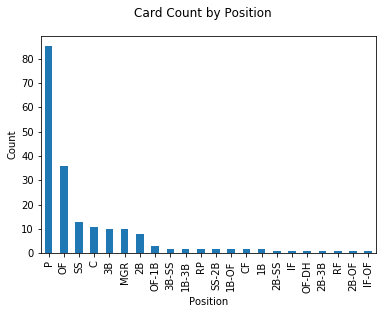

In [16]:
pos_count['Count'].plot.bar()
plot.suptitle('Card Count by Position')
plot.ylabel('Count')
plot.xlabel('Position')

Now, create a dataframe for counts of card companies.

In [12]:
co_count = bb_cp['Company'].value_counts().to_frame().rename(columns={'Company': 'Count'})
co_count

,Count
Topps,175
Score,11
Upper Deck,11


Create a pie chart to represent the proportions of card companies in the dataframe.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x14424270>], dtype=object)

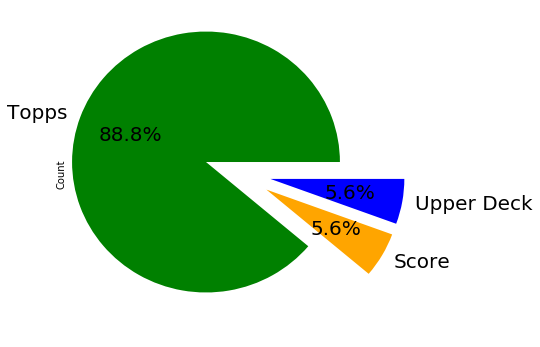

In [108]:
co_count.plot(kind='pie',
              labels=co_count.index,
              colors=['green', 'orange', 'b'],
              autopct='%1.1f%%',
              figsize=(6, 6),
              fontsize=20,
              subplots=True,
              legend=False,
              explode=(0.25, 0.25, 0.25))

Create a dataframe for counts of card set years.

In [13]:
yr_count = bb_cp['Set_Year'].value_counts().to_frame().rename(columns={'Set_Year': 'Count'})
yr_count

,Count
1990,65
1989,61
1992,43
1991,22
1988,5
1987,1


Create one final pie chart for percentage of cards by year.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x16B0F950>], dtype=object)

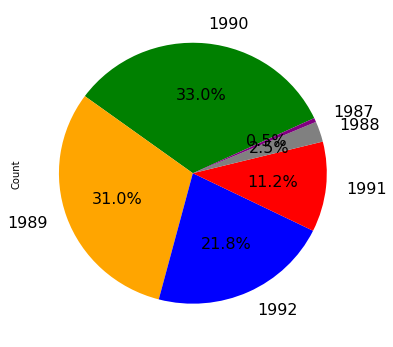

In [111]:
yr_count.plot(kind='pie',
              labels=yr_count.index,
              colors=['green', 'orange', 'blue', 'red', 'grey', 'purple'],
              autopct='%1.1f%%',
              figsize=(6, 6),
              fontsize=16,
              subplots=True,
              legend=False,
              startangle=25,
              labeldistance=1.15)